In [48]:
import h5py

path = "usps.h5"
with h5py.File(path, 'r') as hf:
        train = hf.get('train')
        X_tr = train.get('data')[:]
        y_tr = train.get('target')[:]
        test = hf.get('test')
        X_te = test.get('data')[:]
        y_te = test.get('target')[:]

In [49]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [63]:
def sample_with_class(input: int):
    ids = np.where(y_tr == input)[0]
    ids = ids.reshape(ids.shape[0],)
    rand_id = np.random.choice(ids)
    
    return np.array(X_tr[rand_id].reshape(16, 16), dtype=np.float64)

def upsize_image(img: np.ndarray, size: int):
    return cv2.resize(img, (size, size), interpolation=cv2.INTER_CUBIC)

def downsize_image(img: np.ndarray, size: int):
    return cv2.resize(img, (size, size), interpolation=cv2.INTER_AREA)

def padding_image(img: np.ndarray, size: int):
    return cv2.copyMakeBorder(img, size, size, size, size, cv2.BORDER_CONSTANT, value=0)

def unpadding_image(img: np.ndarray, size: int):
    return img[size:-size, size:-size]

sample_all_class = [] 
for i in range(10):
    # sample_all_class.append(upsize_image(sample_with_class(i), 28))
    image = sample_with_class(i)
    image = downsize_image(image, 15)
    sample_all_class.append(image)

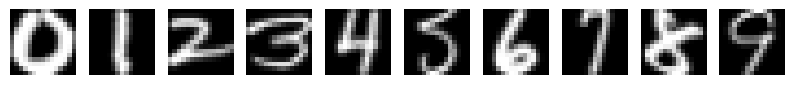

In [64]:
#plot all classes
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(sample_all_class[i], cmap="gray")
    plt.axis("off")

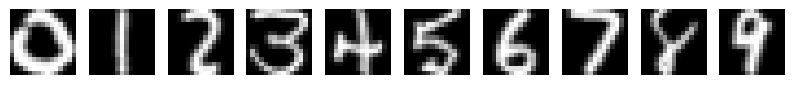

In [57]:
#plot all classes
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(sample_all_class[i], cmap="gray")
    plt.axis("off")

In [65]:
path = "../Datasets/usps_moving"

start_point:  [30  0] end_point:  [15 15] steps:  [-1.  1.]


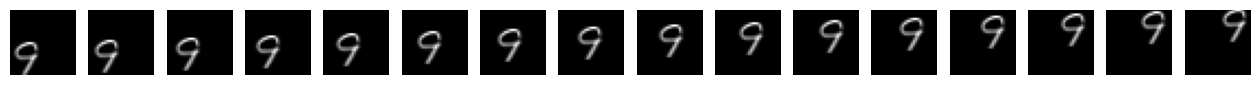

In [66]:
#create canvas size 64 64 
frame_per_vid = 16
img_size = 15
# img_size = 28
canvas_size = 15*2
canvass = [np.zeros((canvas_size, canvas_size), dtype=np.float64) for _ in range(frame_per_vid)]
start_point = np.array([canvas_size, 0], dtype=np.int32)
end_point = np.array([img_size, canvas_size - img_size], dtype=np.int32)
steps = (end_point - start_point) / (frame_per_vid-1)

# steps = np.round((end_point - start_point) / (frame_per_vid-1), 0).astype(np.int32)

print("start_point: ", start_point, "end_point: ", end_point, "steps: ", steps)
interpolation = np.array([start_point + steps * i for i in range(frame_per_vid)], dtype=np.int32)
interpolation[-1] = end_point

# print(interpolaion)

for number, image in enumerate(sample_all_class):
    # os.makedirs(f"usps_data/vid/{number}", exist_ok=True)
    os.makedirs(path, exist_ok=True)
    for i in range(frame_per_vid):
        canvass[i][interpolation[i][0] - img_size:interpolation[i][0], interpolation[i][1]:interpolation[i][1]+img_size] = image
        # canvass[i] = downsize_image(canvass[i], 16)
        # cv2.imwrite(f"usps_data/vid/{number}/frame_{i}.png", canvass[i])
    np_canvass = np.array(canvass)
    np.save(f"{path}/{number}",np_canvass)


plt.figure(figsize=(frame_per_vid,frame_per_vid))
for i in range(frame_per_vid):
    plt.subplot(1,frame_per_vid,i+1)
    plt.imshow(np_canvass[i], cmap="gray")
    plt.axis("off")